# Forschungsdaten der Universität des Saarlandes (UDS)

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

3. [Word Clouds](#3)


<a id="1"></a>
## 1. Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [80]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [81]:
# Erstellen des 1. Dataframes (zeilenweise)
data_uds = pd.read_csv(r'../../data/refined/clarin/uds/uds-records-20240620_refined.csv',
dtype=str,  # Set all columns to be strings
low_memory=False)  # Optional, suppresses the DtypeWarning)

# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_uds_grouped = data_uds.copy()
data_uds_grouped['record id'] = data_uds_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record identifier
data_uds_grouped = data_uds_grouped.groupby('record id').agg({
    'datestamp': 'first',  
    'subject': lambda x: '; '.join(x.dropna().unique()),  # Einzigartige Werte zusammenführen
    'relation': lambda x: '; '.join(x.dropna().unique()),  
    'identifier': lambda x: '; '.join(x.dropna().unique()),  
    'rights': lambda x: '; '.join(x.dropna().unique()),  
    'language': lambda x: '; '.join(x.dropna().unique()),  
    'contributor': lambda x: '; '.join(x.dropna().unique()),
    'type': lambda x: '; '.join(x.dropna().unique()),
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),  
    'description': lambda x: '; '.join(x.dropna().unique()),
    'source': lambda x: '; '.join(x.dropna().unique()),
    'title': lambda x: '; '.join(x.dropna().unique()),
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'description': lambda x: '; '.join(x.dropna().unique()),  
    'creator': lambda x: '; '.join(x.dropna().unique()),
    'date': lambda x: '; '.join(x.dropna().unique()),
    'format': lambda x: '; '.join(x.dropna().unique()),
    'format - mediatype': lambda x: '; '.join(x.dropna().unique()),
    'format - subtype': lambda x: '; '.join(x.dropna().unique()), 
    'publisher': lambda x: '; '.join(x.dropna().unique()),   
    'coverage': lambda x: '; '.join(x.dropna().unique()),
    'record id': 'first'  
}).reset_index(drop=True)

data_uds_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen

data_uds_grouped[['date', 'datestamp']] = data_uds_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_uds[['date', 'datestamp']] = data_uds[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_uds_grouped.replace('','NA', inplace=True)  # Fehlende Werte mit NA ersetzen

C:\Users\miema\AppData\Local\Temp\ipykernel_24436\663949434.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_uds_grouped[['date', 'datestamp']] = data_uds_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')


In [82]:
data_uds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   134 non-null    datetime64[ns, UTC]
 1   subject                     350 non-null    object             
 2   relation                    277 non-null    object             
 3   identifier                  268 non-null    object             
 4   rights                      247 non-null    object             
 5   language                    203 non-null    object             
 6   contributor                 199 non-null    object             
 7   type                        177 non-null    object             
 8   type - dcmi recommendation  177 non-null    object             
 9   description                 163 non-null    object             
 10  source                      160 non-null    object            

                        column count   type
6                  contributor    44  valid
18                    coverage    79  valid
13                     creator   116  valid
12                        date    94  valid
0                    datestamp   134  valid
9                  description   107  valid
14                      format   129  valid
15          format - mediatype   129  valid
16            format - subtype   129  valid
3                   identifier   134  valid
5                     language   129  valid
17                   publisher   117  valid
19                   record id   134  valid
2                     relation   131  valid
4                       rights   131  valid
10                      source    83  valid
1                      subject   127  valid
11                       title   134  valid
7                         type   132  valid
8   type - dcmi recommendation   132  valid


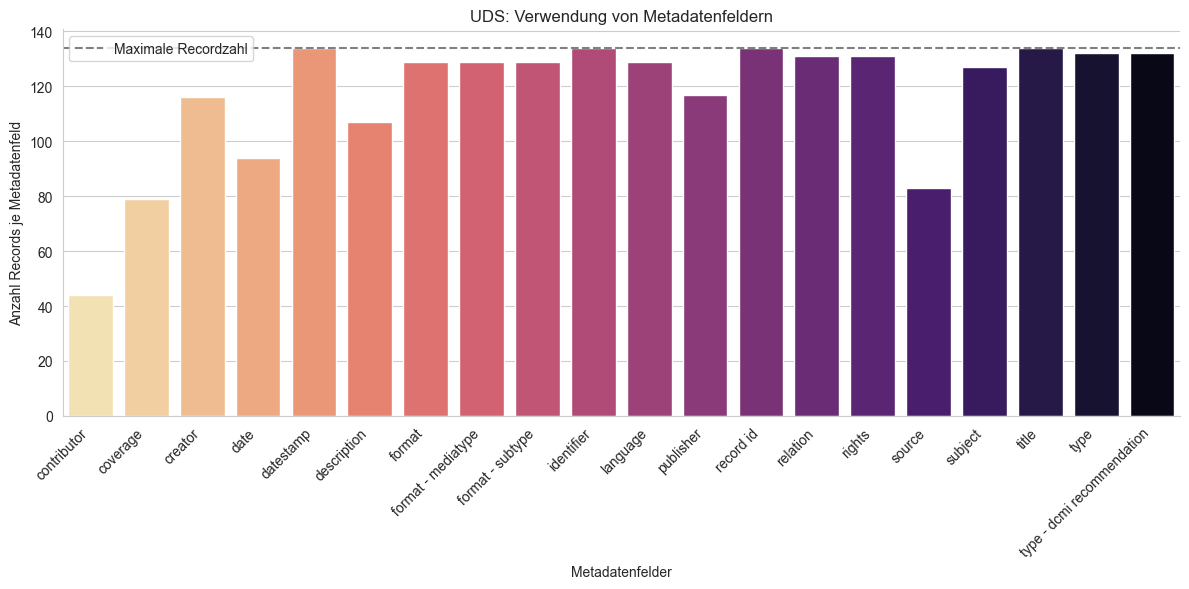

In [83]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_uds_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_uds_grouped[column][data_uds_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_uds_grouped['record id'].nunique()


sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='magma_r')

# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('UDS: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("UDS_Verwendung_von_Metadatenfeldern.png", dpi=600)
plt.show()


In [84]:
'Zeilenweiser Dataframe: Info zu Spalten und Datentypen'
data_uds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   134 non-null    datetime64[ns, UTC]
 1   subject                     350 non-null    object             
 2   relation                    277 non-null    object             
 3   identifier                  268 non-null    object             
 4   rights                      247 non-null    object             
 5   language                    203 non-null    object             
 6   contributor                 199 non-null    object             
 7   type                        177 non-null    object             
 8   type - dcmi recommendation  177 non-null    object             
 9   description                 163 non-null    object             
 10  source                      160 non-null    object            

In [85]:
'Zeilenweiser Dataframe: Erste 5 Zeilen'
data_uds.head()

datestamp             subject  \
0 2020-10-07 13:30:10+00:00    gesture research   
1                       NaT    video annotation   
2                       NaT      time-alignment   
3                       NaT  multimodal corpora   
4                       NaT           phonology   

                                            relation  \
0  Kipp, M. (to appear) Multimedia Annotation, Qu...   
1  Kipp, M. (to appear) ANVIL: A Universal Video ...   
2  Heloir, A., Neff, M. and Kipp, M. (2010) Explo...   
3  Kipp, M. (2008) Spatiotemporal Coding in ANVIL...   
4  Kipp, M. (2004), Gesture Generation by Imitati...   

                           identifier rights language        contributor  \
0                   clarind-uds:anvil    NaN      NaN       Michael Kipp   
1  hdl:11858/00-246C-0000-0005-BD0D-2    NaN      NaN        Quan Nguyen   
2                                 NaN    NaN      NaN  Gabriel Manolache   
3                                 NaN    NaN      NaN                NaN   
4                                 NaN    NaN      NaN                NaN   

       type type - dcmi recommendation  \
0  software                   software   
1       NaN                        NaN   
2       NaN                        NaN   
3       NaN                        NaN   
4       NaN                        NaN   

                                         description source  \
0  ANVIL is a free video annotation tool. It offe...    NaN   
1  ANVIL ist ein frei erhältiches Annotationstool...    NaN   
2                                                NaN    NaN   
3                                                NaN    NaN   
4                                                NaN    NaN   

                                      title  \
0  Anvil The video annotation research tool   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

                                             creator date format  \
0  Michael Kipp\nHochschule Augsburg\nAn der Hoch...  NaT    NaN   
1                                                NaN  NaT    NaN   
2                                                NaN  NaT    NaN   
3                                                NaN  NaT    NaN   
4                                                NaN  NaT    NaN   

  format - mediatype format - subtype publisher coverage  \
0                NaN              NaN       NaN      NaN   
1                NaN              NaN       NaN      NaN   
2                NaN              NaN       NaN      NaN   
3                NaN              NaN       NaN      NaN   
4                NaN              NaN       NaN      NaN   

                                           record id  
0  oai:fedora.clarin-d.uni-saarland.de:clarind-ud...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [86]:
'Zeilenweiser Dataframe: Statistische Kennzahlen'
data_uds.describe()

datestamp           subject  \
count                                   134               350   
unique                                  NaN               196   
top                                     NaN  starodruki 18 w.   
freq                                    NaN                27   
mean    2021-01-22 04:39:15.694029824+00:00               NaN   
min               2020-10-07 13:30:10+00:00               NaN   
25%               2020-10-07 13:30:10+00:00               NaN   
50%               2020-10-07 13:30:10+00:00               NaN   
75%               2020-10-07 13:30:10+00:00               NaN   
max               2024-01-04 11:09:45+00:00               NaN   

                                                 relation  \
count                                                 277   
unique                                                265   
top     Aida Kasieva, Jörg Knappen, Stefan Fischer, an...   
freq                                                    3   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                           identifier       rights language contributor  \
count                             268          247      203         199   
unique                            264           21       14         141   
top     hdl:21.11119/0000-0004-B62D-D  CC BY NC SA      pol  Elke Teich   
freq                                3          215       93           8   
mean                              NaN          NaN      NaN         NaN   
min                               NaN          NaN      NaN         NaN   
25%                               NaN          NaN      NaN         NaN   
50%                               NaN          NaN      NaN         NaN   
75%                               NaN          NaN      NaN         NaN   
max                               NaN          NaN      NaN         NaN   

             type type - dcmi recommendation  \
count         177                        177   
unique         19                          5   
top     starodruk                       text   
freq           87                        135   
mean          NaN                        NaN   
min           NaN                        NaN   
25%           NaN                        NaN   
50%           NaN                        NaN   
75%           NaN                        NaN   
max           NaN                        NaN   

                                              description           source  \
count                                                 163              160   
unique                                                159              155   
top     The Manas-UdS Kyrgyz Corpus is an annotated co...  Pol. 7. II. 303   
freq                                                    3                2   
mean                                                  NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

                          title  \
count                       140   
unique                      133   
top     Manas-UdS Kyrgyz Corpus   
freq                          3   
mean                        NaN   
min                         NaN   
25%                         NaN   
50%                         NaN   
75%                         NaN   
max                         NaN   

                                              

In [87]:
'Recordweiser Dataframe: Info zu Spalten und Datentypen'
data_uds_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   134 non-null    datetime64[ns, UTC]
 1   subject                     134 non-null    object             
 2   relation                    134 non-null    object             
 3   identifier                  134 non-null    object             
 4   rights                      134 non-null    object             
 5   language                    134 non-null    object             
 6   contributor                 134 non-null    object             
 7   type                        134 non-null    object             
 8   type - dcmi recommendation  134 non-null    object             
 9   description                 134 non-null    object             
 10  source                      134 non-null    object            

In [88]:
'Recordweiser Dataframe: Erste 5 Zeilen'
data_uds_grouped.head()


datestamp  \
0 2024-01-04 11:01:41+00:00   
1 2023-10-23 13:57:35+00:00   
2 2022-02-02 16:15:39+00:00   
3 2022-02-02 16:17:42+00:00   
4 2023-02-21 19:14:18+00:00   

                                             subject  \
0          kyrgyz language; manas epos; jamila; news   
1             ukrainian language; news; ukraine; war   
2  translation; human translation; parallel corpu...   
3                                                 NA   
4          universal dependencies; scientific german   

                                            relation  \
0  Aida Kasieva, Jörg Knappen, Stefan Fischer, an...   
1  Stefan Fischer, Kateryna Haidarzhyi, Jörg Knap...   
2  Lapshinova-Koltunski, Ekaterina, Maja Popović ...   
3                                                 NA   
4  Krielke, Marie-Pauline, Luigi Talamo, Jörg Kna...   

                                          identifier  \
0  clarind-uds:kyrgyz; hdl:21.11119/0000-0004-B62D-D   
1  clarind-uds:cnc-ua; hdl:21.11119/0000-000E-1C5C-D   
2  clarind-uds:dihutra; hdl:21.11119/0000-000A-1B...   
3                               clarind-uds:epic-uds   
4  clarind-uds:gutesaetze-dtaw; hdl:21.11119/0000...   

                                              rights                 language  \
0  CC BY NC SA; © Erkin Too, non-commercial, full...                      kir   
1  CC BY NC ND; © Suspilne Movlennya Public Broad...                      ukr   
2                              CC NC SA; CC BY NC SA  eng; rus; hrv; fin; deu   
3                                                 NA                       NA   
4                                        CC BY NC SA                      deu   

                                         contributor  \
0  Aida Kasieva; Jörg Knappen; Stefan Fischer; El...   
1  Stefan Fischer; Kateryna Haidarzhyi; Jörg Knap...   
2  Ekaterina Lapshinova-Koltunski; Maja Popović; ...   
3                                                 NA   
4                                                 NA   

                                           type type - dcmi recommendation  \
0  collection; written corpus; newspaper corpus           collection; text   
1  collection; written corpus; newspaper corpus           collection; text   
2                                       dataset                    dataset   
3                                            NA                         NA   
4                          collection; treebank           collection; text   

                                         description  \
0  The Manas-UdS Kyrgyz Corpus is an annotated co...   
1  CNC-UA was built from a database dump provided...   
2  The corpus Dihutra (Differences in Human Trans...   
3                                                 NA   
4  This is a Universal Dependency parsed version ...   

                                              source  \
0                                                 NA   
1                                                 NA   
2  English news originals; Russian translations o...   
3                                                 NA   
4                                                 NA   

                                               title  \
0                            Manas-UdS Kyrgyz Corpus   
1    Contemporary News Corpus for Ukrainian (CNC-UA)   
2         DiHuTra (Differences in human translation)   
3                                           epic-uds   
4  Deutsches Textarchiv (Wissenschaft) Universal ...   

                       date  \
0                       NaT   
1 2022-01-01 00:00:00+00:00   
2 2022-01-01 00:00:00+00:00   
3                       NaT   
4 2022-01-01 00:00:00+00:00   

                                             creator    format  \
0  Aida Kasieva, Kyrgyz-Turkish Manas University,...  text/xml   
1  Stefan Fischer, Universität des Saarlandes; Ka...  text/xml   
2  Ekaterina Lapshinova-Koltunski, UNiversität de...  text/xml   
3                                                 NA        NA   

In [89]:
'Recordweiser Dataframe: Statistische Kennzahlen'
data_uds_grouped.describe()

datestamp           subject  \
count                                   134               134   
unique                                  NaN                69   
top                                     NaN  starodruki 18 w.   
freq                                    NaN                26   
mean    2021-01-22 04:39:15.694029568+00:00               NaN   
min               2020-10-07 13:30:10+00:00               NaN   
25%               2020-10-07 13:30:10+00:00               NaN   
50%               2020-10-07 13:30:10+00:00               NaN   
75%               2020-10-07 13:30:10+00:00               NaN   
max               2024-01-04 11:09:45+00:00               NaN   

                                                 relation  \
count                                                 134   
unique                                                130   
top     Aida Kasieva, Jörg Knappen, Stefan Fischer, an...   
freq                                                    3   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                               identifier       rights  \
count                                                 134          134   
unique                                                132           15   
top     clarind-uds:kyrgyz; hdl:21.11119/0000-0004-B62D-D  CC BY NC SA   
freq                                                    3          110   
mean                                                  NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

        language contributor       type type - dcmi recommendation  \
count        134         134        134                        134   
unique        17          42         17                          8   
top     pol; lat          NA  starodruk                       text   
freq          55          90         82                         96   
mean         NaN         NaN        NaN                        NaN   
min          NaN         NaN        NaN                        NaN   
25%          NaN         NaN        NaN                        NaN   
50%          NaN         NaN        NaN                        NaN   
75%          NaN         NaN        NaN                        NaN   
max          NaN         NaN        NaN                        NaN   

       description source                    title  \
count          134    134                      134   
unique         106     84                      132   
top             NA     NA  Manas-UdS Kyrgyz Corpus   
freq            27     51                        3   
mean           NaN    NaN                      NaN   
min            NaN    NaN                      NaN   
25%            NaN    NaN                      NaN   
50%            NaN    NaN                      NaN   
75%            NaN    NaN                      NaN   
max            NaN    NaN                      NaN   

                                       date creator           format  \
count                                    94     134              134   
unique                                  NaN      99                8   
top                                     NaN      NA  application/xml   
freq                                    NaN      18               94   
mean    1837-01-24 13:47:14.042553344+00:00     NaN              NaN   
min               1678-01-01 00:0

In [90]:
'Verwendete Farbpalette'

icefire_palette = sns.color_palette("icefire", 12)
icefire_hex = icefire_palette.as_hex()
print(icefire_hex)
sns.color_palette('icefire', 12)

sns.color_palette("icefire", 12, as_cmap=False)


['#87c2cf', '#4e9ecd', '#3a73ce', '#494c9e', '#343356', '#212028', '#2a1e20', '#542732', '#8d2e43', '#c33a3c', '#e66734', '#f5a066']


[(0.52894085, 0.76217215, 0.81336913),
 (0.30516161, 0.618389, 0.80528692),
 (0.22665681, 0.45052233, 0.80860217),
 (0.28640325, 0.29655509, 0.61811374),
 (0.20586893, 0.19855368, 0.33701661),
 (0.12948748, 0.12733187, 0.15580631),
 (0.16533376, 0.11797856, 0.12621303),
 (0.33107961, 0.1530674, 0.19543758),
 (0.55348804, 0.17956232, 0.26416003),
 (0.7630579, 0.22731637, 0.23700095),
 (0.90195099, 0.40380687, 0.20301555),
 (0.95923863, 0.62676473, 0.40043317)]

<a id="2"></a>
## 2. Univariate Plots

[Zurück zum Anfang](#0)



In [141]:
daily_counts = data_uds.groupby(data_uds['datestamp'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#edf5fa', 'figure.facecolor': 'white' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='datestamp', y='cumulative_count', kind='line', aspect=2.5, errorbar = None, color='#4e9ecd', linewidth=3)


plt.title('UDS: Datenbestand im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Summe der publizierten Records', fontsize=12)
# plt.xticks(rotation=45) 
plt.savefig("UDS_datestamp_line_cum.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühster Datestamp:', data_uds['datestamp'].min().date(), '; spätester Datestamp:', data_uds['datestamp'].max().date())

frühster Datestamp: 2020-10-07 ; spätester Datestamp: 2024-01-04


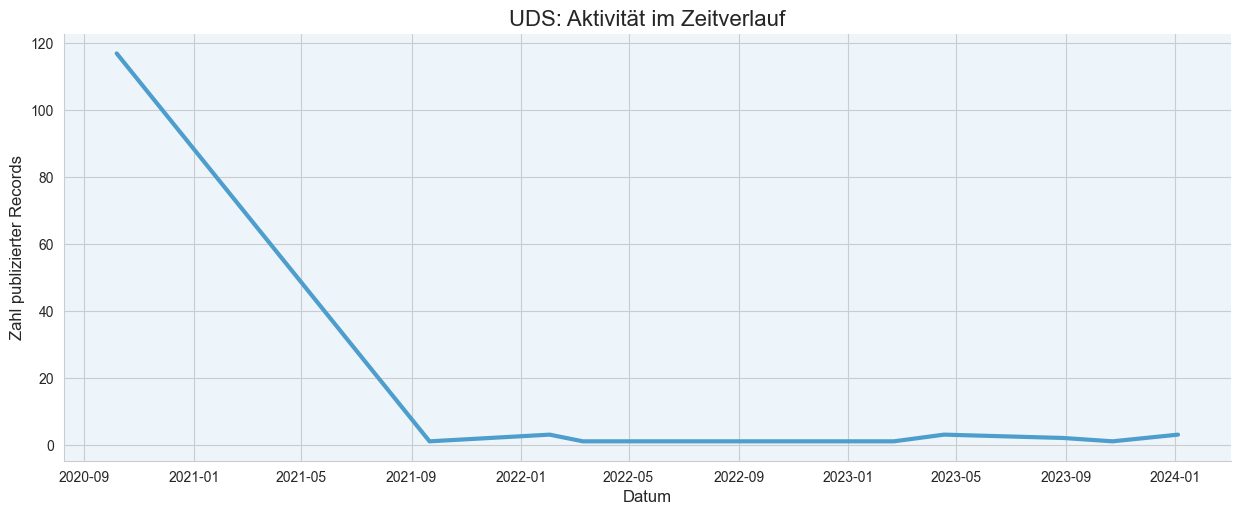

frühster Datestamp: 2020-10-07 ; spätester Datestamp: 2024-01-04


In [142]:

# verwendet daily_counts = gruppierte Records nach datestamp

sns.set_style('whitegrid', {'axes.facecolor':'#edf5fa', 'figure.facecolor': 'white' }) # Style des Plots anpassen

sns.relplot(data=daily_counts, x='datestamp', y='count', kind='line', color='#4e9ecd', aspect=2.5, linewidth=3) 

plt.title('UDS: Aktivität im Zeitverlauf', fontsize=16)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Zahl publizierter Records', fontsize=12)
plt.savefig("uds_datestamp_line.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühster Datestamp:', data_uds['datestamp'].min().date(), '; spätester Datestamp:', data_uds['datestamp'].max().date())

### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

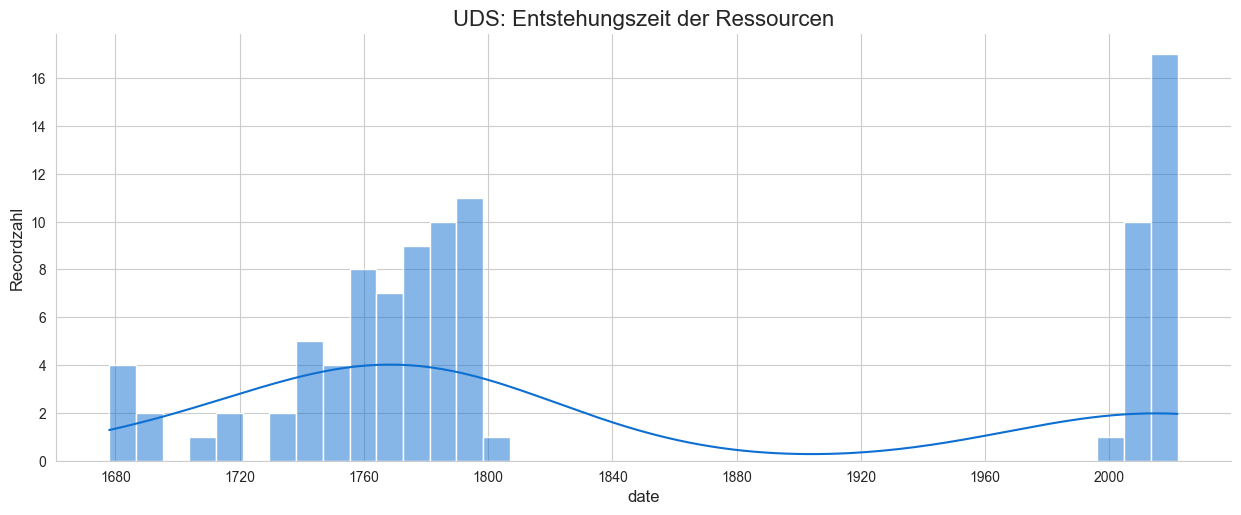

frühstes Datum: 1678-01-01 ; spätestes Datum: 2022-01-01


In [140]:

sns.set_style('whitegrid')
sns.displot(data_uds_grouped, x='date', bins=40, kde=True, color = '#0d6fd1', aspect=2.5) # Erscheinungszeitpunkt der Forschungsdaten anhand von 'date' in absolten Zahlen

#plt.xticks(rotation=45)
plt.title('UDS: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("uds_date_hist.png", dpi=600, bbox_inches='tight')
plt.show()
print('frühstes Datum:', data_uds_grouped['date'].min().date(), '; spätestes Datum:', data_uds_grouped['date'].max().date())



### Sprachverteilung

[Zurück zum Anfang](#0)

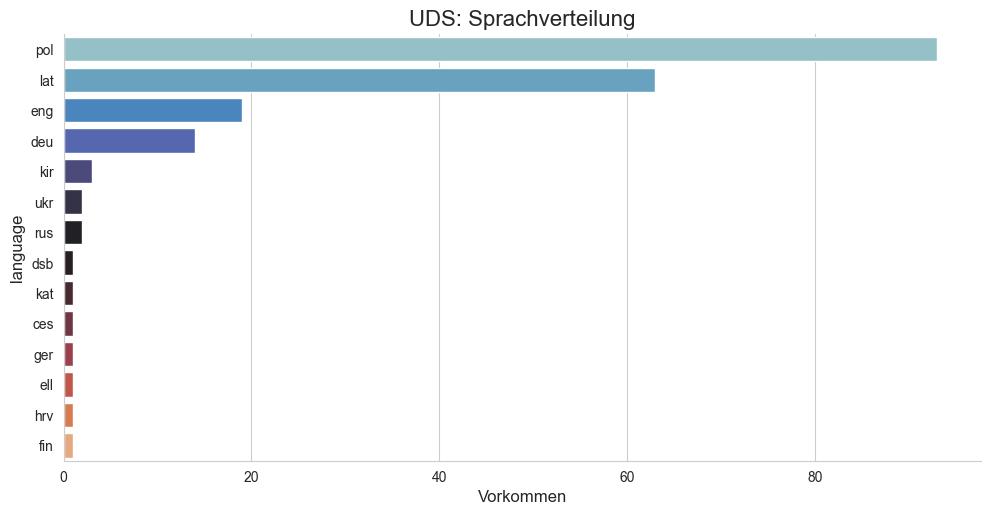

In [156]:
'Catplot: Verteilung der Sprachen'

sns.set_style('whitegrid')
# Reihenfolge der Werte festlegen
order = data_uds['language'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_uds['language'] = pd.Categorical(data_uds['language'], categories=order, ordered=True)

sns.catplot(data_uds, y = 'language', kind = 'count', aspect = 2, hue = 'language', palette = 'icefire', legend=False)

plt.title('UDS: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.xlabel('Vorkommen', fontsize=12)
plt.savefig("uds_language_cat.png", dpi=600, bbox_inches='tight')
plt.show()

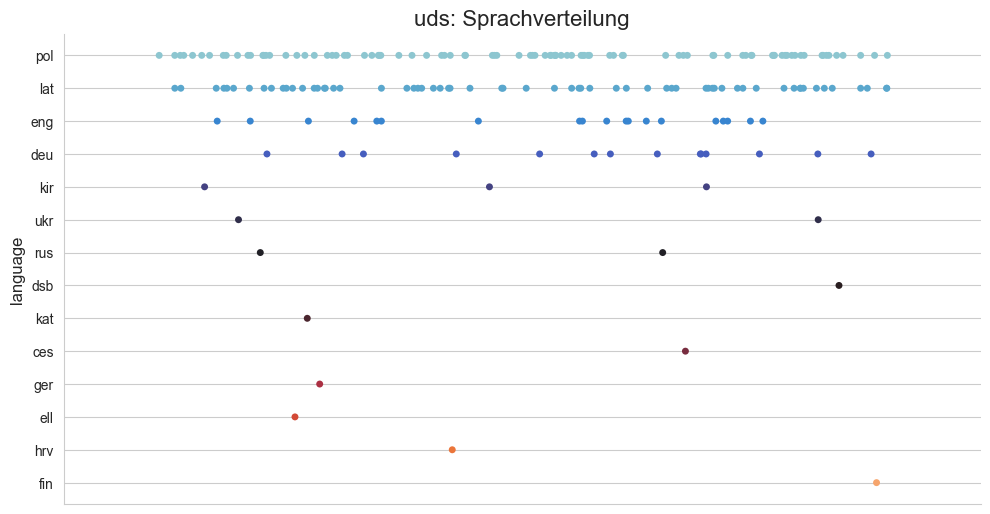

In [155]:
'Scatterplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_uds['language'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_uds['language'] = pd.Categorical(data_uds['language'], categories=order, ordered=True)


sns.catplot(data_uds, y = 'language', aspect = 2, hue = 'language', palette="icefire", jitter=0.4, legend=False) # Sprachverteilung mit erhöhtem Jitter

plt.title('UDS: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.show()


### Verteilung der Publisher

[Zurück zum Anfang](#0)

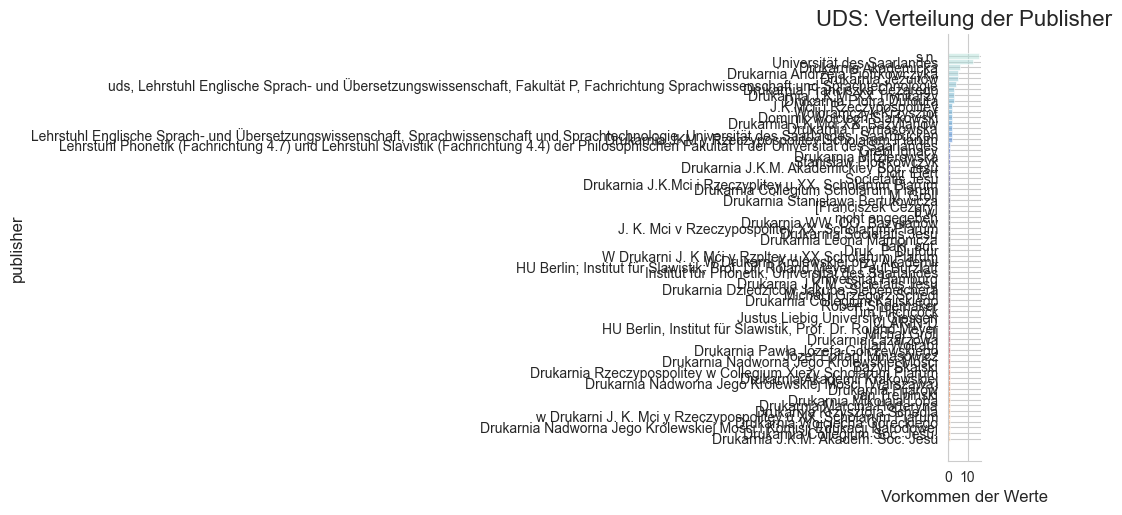

In [164]:
'zu viele Werte'

# Reihenfolge der Werte festlegen
order = data_uds['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_uds['publisher'] = pd.Categorical(data_uds['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.displot(data_uds, y = 'publisher', aspect = 2, hue='publisher', palette="icefire", legend=False)



plt.title('UDS: Verteilung der Publisher', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('publisher', fontsize=12)
plt.show()


### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

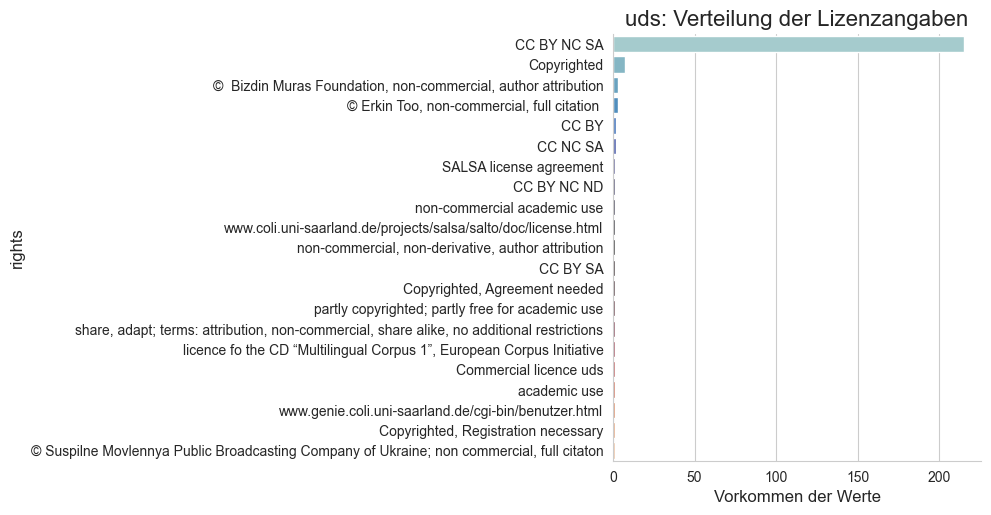

In [97]:
'Catplot: Verteilung der Lizenzangaben'

order = data_uds['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_uds['rights'] = pd.Categorical(data_uds['rights'], categories=order, ordered=True)


sns.catplot(data_uds, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="icefire", legend=False)

plt.title('uds: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.show()

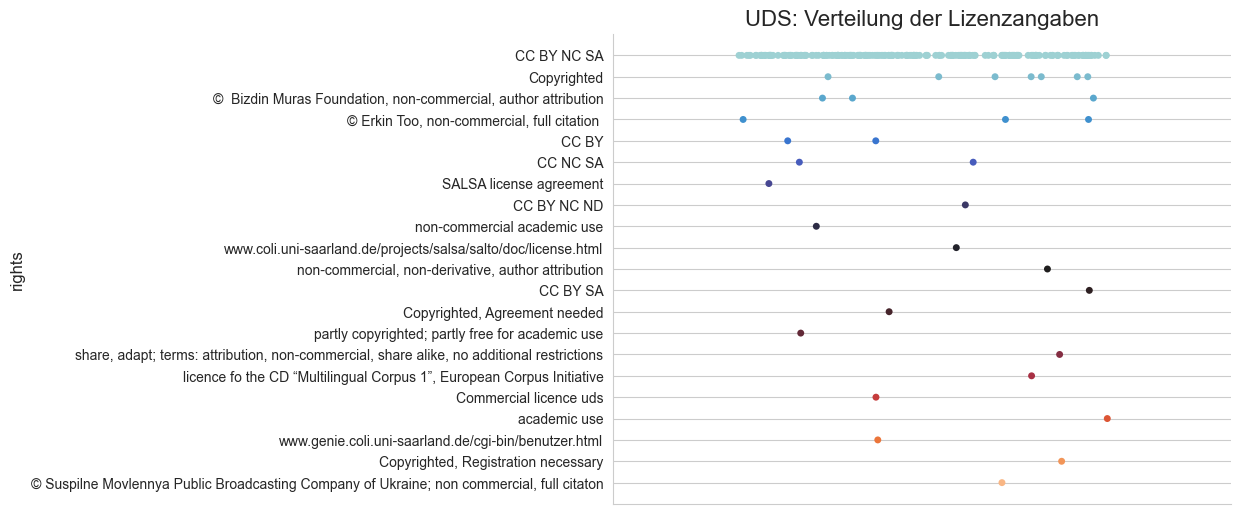

In [163]:
'Scatterplot: Verteilung der Lizenzangaben'

order = data_uds['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_uds['rights'] = pd.Categorical(data_uds['rights'], categories=order, ordered=True)


sns.catplot(data_uds, y = 'rights', aspect = 2.5, hue = 'rights', palette="icefire", jitter=0.3, legend=False)

plt.title('UDS: Verteilung der Lizenzangaben', fontsize=16)
plt.ylabel('rights', fontsize=12)
plt.savefig("uds_rights_scatter.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

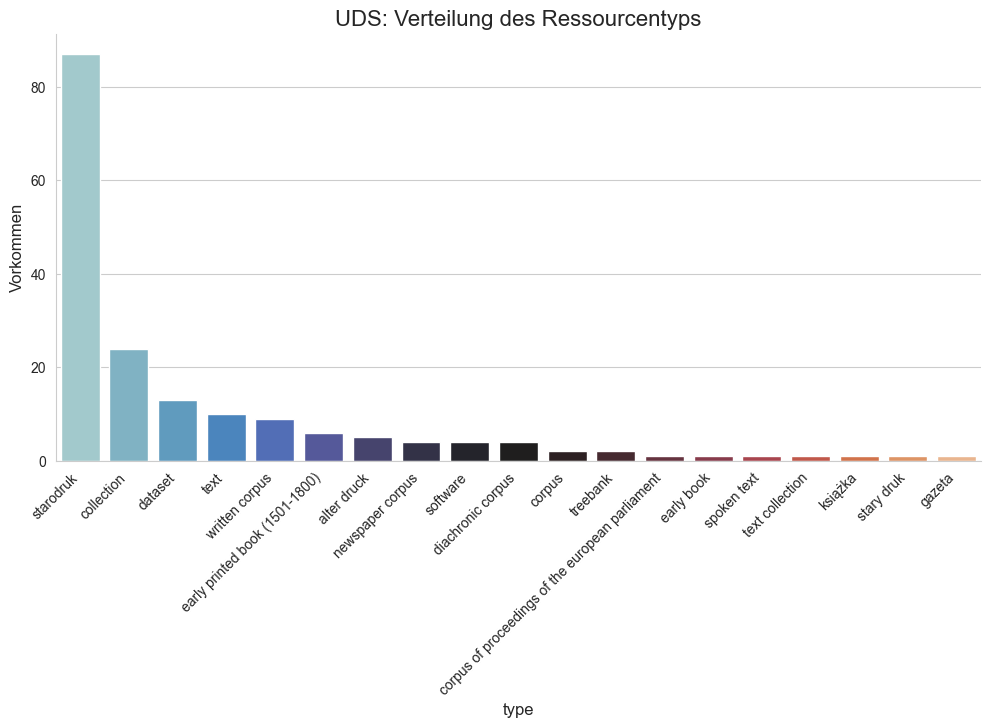

In [153]:
'Verteilung des Ressourcentyps wie von der uds angegeben'

# Reihenfolge der Werte festlegen
order_type = data_uds['type'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_uds['type'] = pd.Categorical(data_uds['type'], categories=order_type, ordered=True)
sns.set_style('whitegrid')
sns.catplot(data_uds, x = 'type', kind = 'count', aspect = 2, hue = 'type', palette='icefire', legend=False)

plt.title('UDS: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('type', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("uds_type_cat.png", dpi=600, bbox_inches='tight')
plt.show()

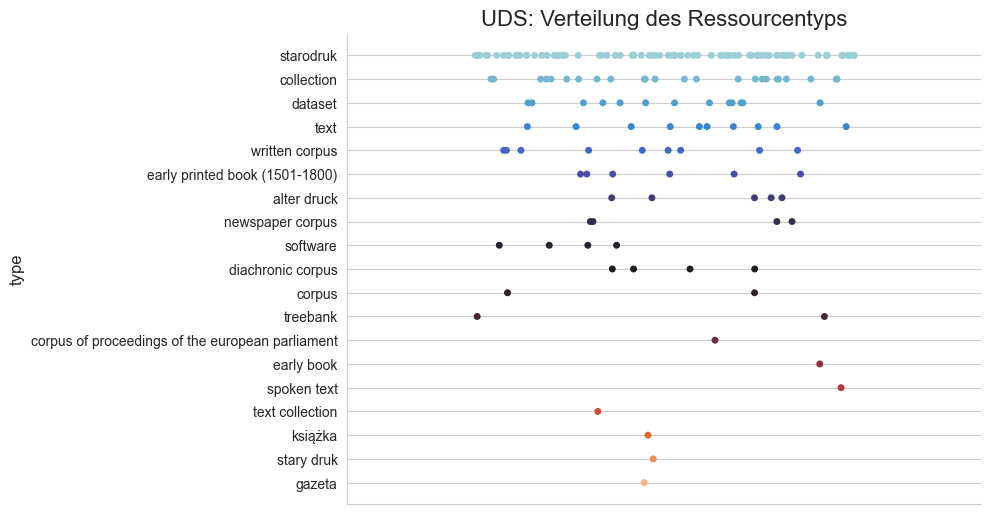

In [145]:
'Verteilung des Ressourcentyps wie von der UDS angegeben'

# Reihenfolge der Werte festlegen
order_type = data_uds['type'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_uds['type'] = pd.Categorical(data_uds['type'], categories=order_type, ordered=True)
sns.set_style('whitegrid')
sns.catplot(data_uds, y = 'type', aspect = 2, hue = 'type', jitter=0.3, palette='icefire', legend=False)

plt.title('UDS: Verteilung des Ressourcentyps', fontsize=16)
plt.ylabel('type', fontsize=12)
plt.savefig("uds_type_scatter.png", dpi=600, bbox_inches='tight')

plt.xticks(rotation=90)
plt.show()

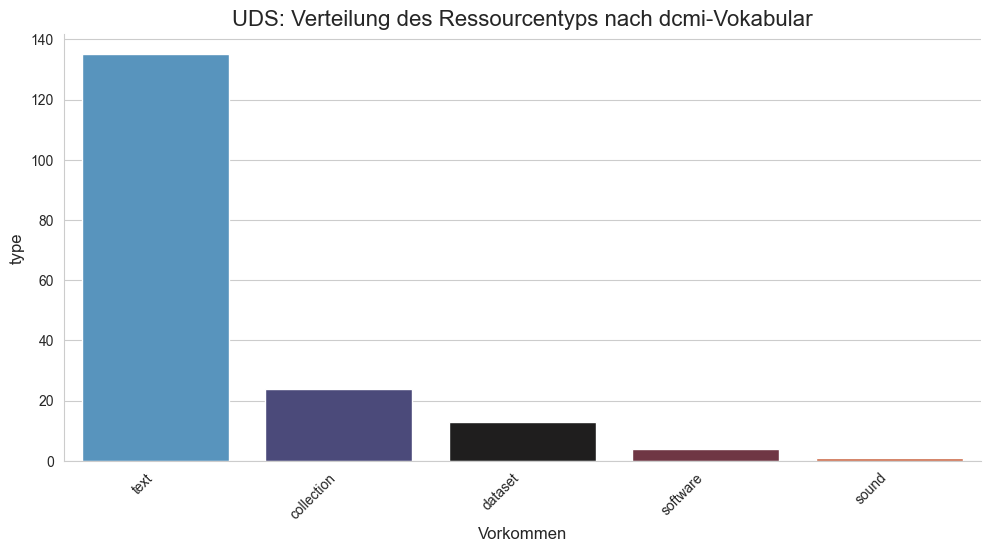

In [147]:
'Verteilung des Ressourcentyps nach dcmi-Vokabular'

order_dcmi = data_uds['type - dcmi recommendation'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_uds['type - dcmi recommendation'] = pd.Categorical(data_uds['type - dcmi recommendation'], categories=order_dcmi, ordered=True)

sns.catplot(data_uds, x = 'type - dcmi recommendation', kind = 'count', aspect = 2, hue = 'type - dcmi recommendation', palette='icefire', legend=False)

plt.title('UDS: Verteilung des Ressourcentyps nach dcmi-Vokabular', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("uds_type_dcmi_cat.png", dpi=600, bbox_inches='tight')
plt.show()

### Verteilung des Formats
[Zurück zum Anfang](#0)

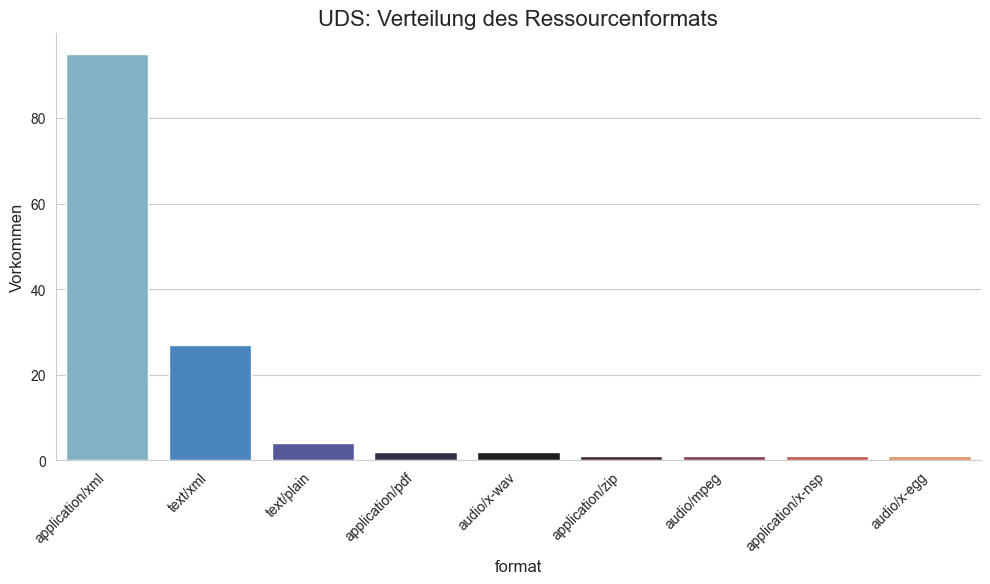

In [150]:
'Verteilung des Formats wie von der uds angegeben'

# Reihenfolge der Werte festlegen
order_type = data_uds['format'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_uds['format'] = pd.Categorical(data_uds['format'], categories=order_type, ordered=True)

sns.catplot(data_uds, x = 'format', kind = 'count', aspect = 2, hue = 'format', palette='icefire', legend=False)

plt.title('UDS: Verteilung des Ressourcenformats', fontsize=16)
plt.xlabel('format', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.savefig("uds_format_cat.png", dpi=600, bbox_inches='tight')
plt.xticks(rotation=45, ha='right')
plt.show()

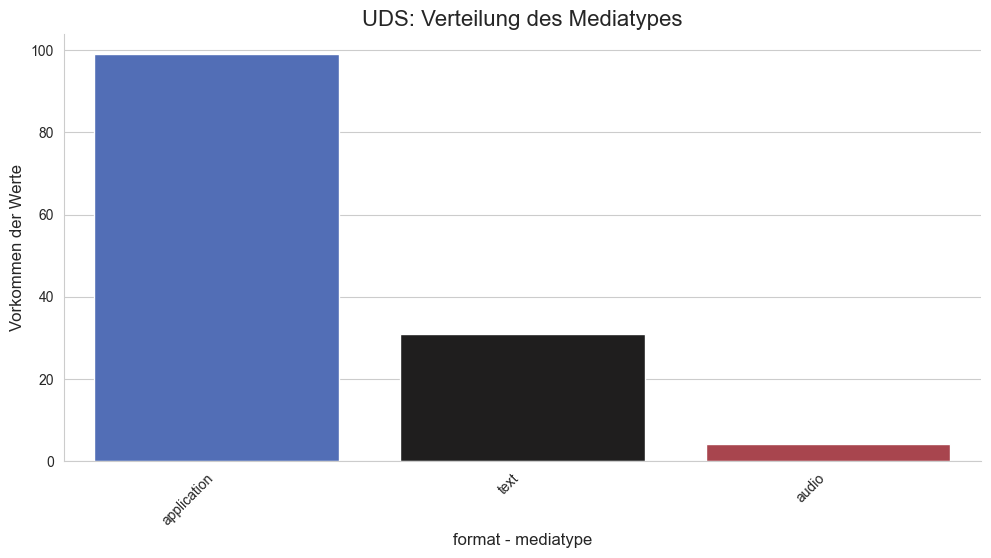

In [151]:
'Verteilung des Formats nach dcmi-Vokabular'

# Reihenfolge der Werte festlegen
order_type = data_uds['format - mediatype'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_uds['format - mediatype'] = pd.Categorical(data_uds['format - mediatype'], categories=order_type, ordered=True)

sns.catplot(data_uds, x = 'format - mediatype', kind = 'count', aspect = 2, hue = 'format - mediatype', palette='icefire', legend=False)

plt.title('UDS: Verteilung des Mediatypes', fontsize=16)
plt.xlabel('format - mediatype', fontsize=12)
plt.ylabel('Vorkommen der Werte', fontsize=12)
plt.savefig("uds_format_mediatype_cat.png", dpi=600, bbox_inches='tight')

plt.xticks(rotation=45, ha='right')
plt.show()

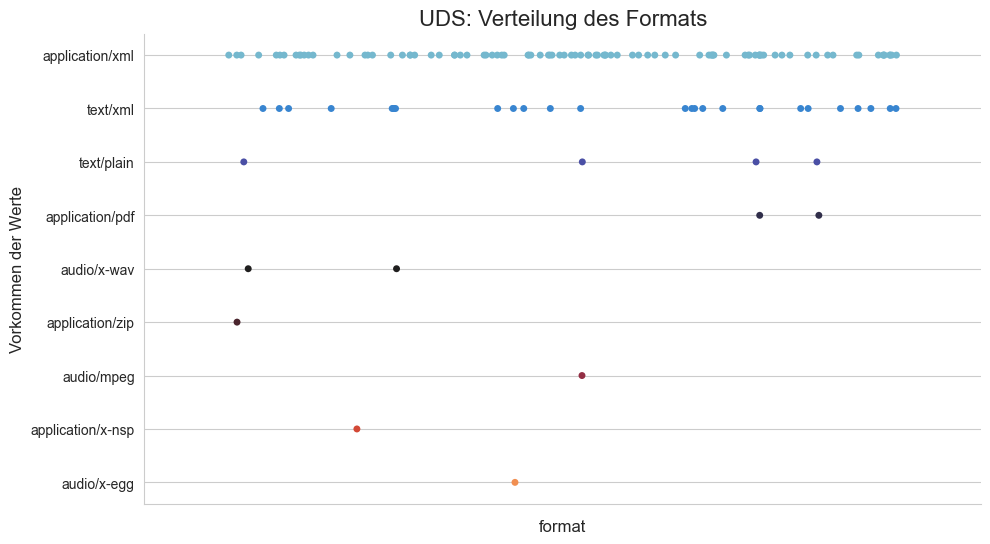

In [152]:
'Verteilung des Formats wie von der uds angegeben'

# Reihenfolge der Werte festlegen
order_type = data_uds['format'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_uds['format'] = pd.Categorical(data_uds['format'], categories=order_type, ordered=True)

sns.catplot(data_uds, y = 'format', aspect = 2, hue = 'format', jitter = 0.4, palette='icefire', legend=False)

plt.title('UDS: Verteilung des Formats', fontsize=16)
plt.xlabel('format', fontsize=12)
plt.ylabel('Vorkommen der Werte', fontsize=12)
plt.savefig("uds_format_scatter.png", dpi=600, bbox_inches='tight')
plt.xticks(rotation=90)
plt.show()

### Verteilung der Geltungsbereiche
[Zurück zum Anfang](#0)

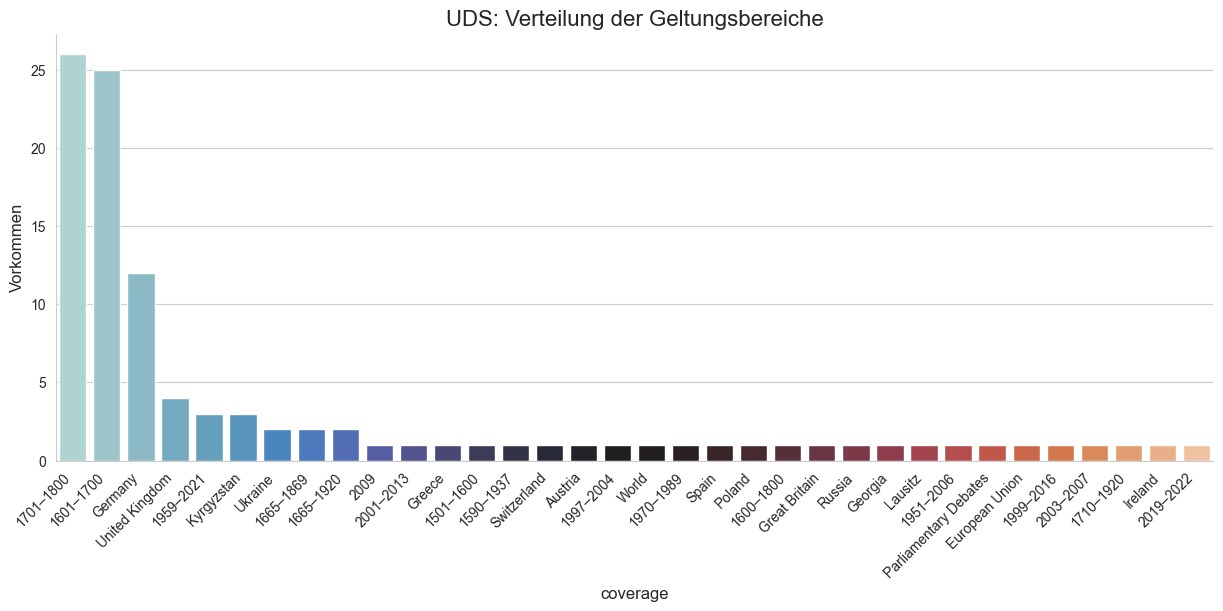

In [128]:

# Reihenfolge der Werte festlegen
order = data_uds['coverage'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_uds['coverage'] = pd.Categorical(data_uds['coverage'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.catplot(data_uds, x = 'coverage', kind='count', hue='coverage', palette="icefire", aspect =2.5, legend=False) 

plt.title('UDS: Verteilung der Geltungsbereiche', fontsize=16)
plt.xlabel('coverage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Vorkommen', fontsize=12)
plt.savefig("UDS_Verteilung_coverage_hist.png", dpi=600, bbox_inches='tight')
plt.show()

### Verteilung der Mitwirkenden

[Zurück zum Anfang](#0)

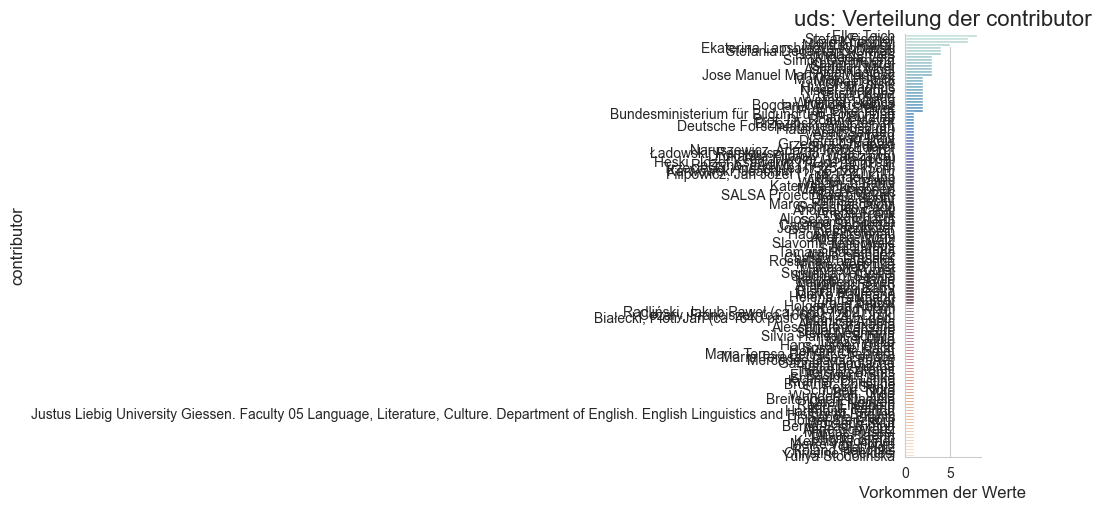

In [105]:
'zu viele Werte, s. Wordcloud'

# Reihenfolge der Werte festlegen
order_type = data_uds['contributor'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_uds['contributor'] = pd.Categorical(data_uds['contributor'], categories=order_type, ordered=True)

sns.catplot(data_uds, y = 'contributor', kind = 'count', aspect = 2, hue = 'contributor', palette='icefire', legend=False)

plt.title('uds: Verteilung der contributor', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('contributor', fontsize=12)


plt.show()

<a id="3"></a>
## 3. Word Clouds

[Zurück zum Anfang](#0)



### Titelbegriffe

[Zurück zum Anfang](#0)

In [106]:
'Anpassung des text encodings für die Wordcloud nicht möglich'

text_data = data_uds["title"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set([
    'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
    'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
    'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from'])
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


{'y': 1.0, 'w': 0.8714285714285714, 'na': 0.6571428571428571, 'do': 0.5857142857142857, 'z': 0.5571428571428572, 'Roku': 0.32857142857142857, 'przez': 0.2714285714285714, 'Dnia': 0.22857142857142856, 'O': 0.22857142857142856, 'i': 0.22857142857142856, 'Corpus': 0.21428571428571427, 'się': 0.21428571428571427, 'X': 0.21428571428571427, 'od': 0.15714285714285714, 'albo': 0.15714285714285714, 'przy': 0.14285714285714285, 'po': 0.12857142857142856, 'M': 0.11428571428571428, 'dla': 0.11428571428571428, 'Pogrzebie': 0.1, 'P': 0.1, 'Prawa': 0.1, 'Wielkiego': 0.1, 'Jasnie': 0.1, 'Kazania': 0.1, 'T': 0.1, 'wiadomości': 0.08571428571428572, 'c': 0.08571428571428572, 'Kazanie': 0.08571428571428572, 'miane': 0.08571428571428572, 'UdS': 0.07142857142857142, 'nie': 0.07142857142857142, 'Pana': 0.07142857142857142, 'Pańskiego': 0.07142857142857142, 'starosty': 0.07142857142857142, 'Script': 0.05714285714285714, 'iey': 0.05714285714285714, 'bez': 0.05714285714285714, 'Krolow': 0.05714285714285714, 'Po


### Urheber*innen

[Zurück zum Anfang](#0)

{'Universität': 1.0, 'Saarlandes': 0.9428571428571428, 'Sprachwissenschaft': 0.5714285714285714, 'Sprachtechnologie': 0.5714285714285714, 'Saarbrücken': 0.37142857142857144, 'Fachrichtung': 0.34285714285714286, 'ca': 0.2857142857142857, 'Campus': 0.2571428571428571, 'Germany': 0.2, 'Franciszek': 0.2, 'Józef': 0.2, 'Stanisław': 0.2, 'University': 0.2, 'Sprach': 0.17142857142857143, 'Jan': 0.17142857142857143, 'Jörg': 0.17142857142857143, 'Knappen': 0.17142857142857143, 'Englische': 0.14285714285714285, 'Übersetzungswissenschaft': 0.14285714285714285, 'C7': 0.14285714285714285, 'Elke': 0.14285714285714285, 'Teich': 0.14285714285714285, 'Institut': 0.11428571428571428, 'DFG': 0.11428571428571428, 'Lehrstuhl': 0.11428571428571428, 'Fakultät': 0.11428571428571428, 'P': 0.11428571428571428, 'A2': 0.11428571428571428, 'Adam': 0.11428571428571428, 'Jezierski': 0.11428571428571428, 'Salezy': 0.11428571428571428, 'Andrzej': 0.11428571428571428, 'Martínez': 0.11428571428571428, 'Augsburg': 0.0857

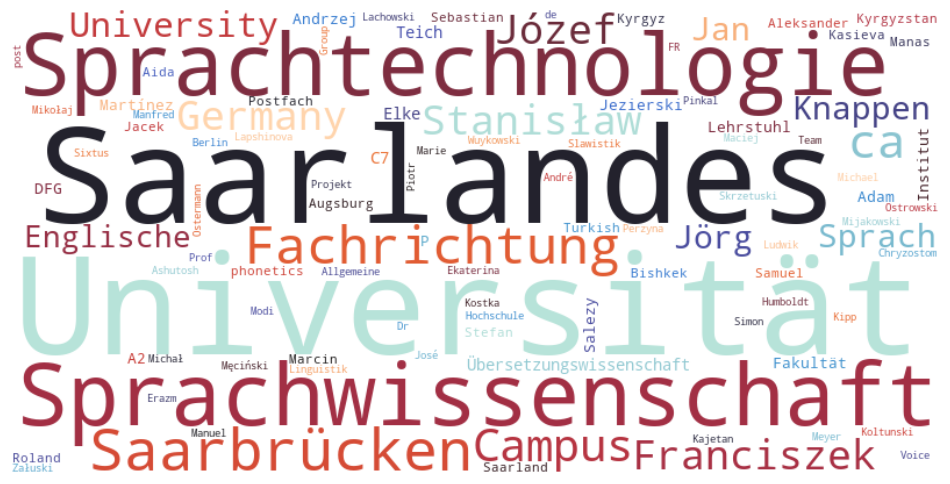

In [129]:

'Word Cloud aufgrund der Vielfalt der Personennamen schwer auszuwerten'

text_data = data_uds["creator"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("UDS_Wordcloud_creator.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud



### Quellen

[Zurück zum Anfang](#0)

{'Biblioteka Jagiellońska': 1.0, 'Jagiellońska BJ': 1.0, 'BJ St': 1.0, 'St Dr': 1.0, 'Dr I': 0.8148148148148148, 'I Biblioteka': 0.7037037037037037, 'vnd': 0.5185185185185185, 'edition': 0.3888888888888889, 'English': 0.37037037037037035, 'Comments': 0.3333333333333333, 'corpus is': 0.3333333333333333, 'M': 0.3148148148148148, 'First edition': 0.3148148148148148, 'Further editions': 0.3148148148148148, 'Title': 0.2962962962962963, 'http www': 0.2962962962962963, 'Speisen': 0.25925925925925924, 'http': 0.24074074074074073, 'Author': 0.24074074074074073, 'Frankfurt': 0.2222222222222222, 'Vom': 0.2222222222222222, 'copy at': 0.2222222222222222, 'Koch': 0.2037037037037037, 'Herzog August': 0.2037037037037037, 'August Bibliothek': 0.2037037037037037, 'Augsburg': 0.18518518518518517, 'man': 0.16666666666666666, 'als': 0.16666666666666666, 'bey': 0.16666666666666666, 'Koch Buch': 0.14814814814814814, 'de': 0.12962962962962962, 'GO': 0.12962962962962962, 'ist': 0.12962962962962962, 'allerhand'

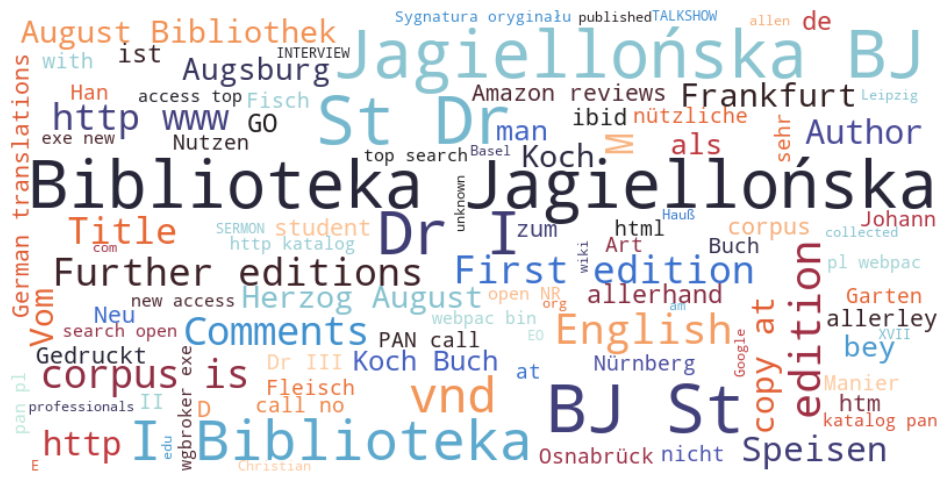

In [108]:
text_data = data_uds["source"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, 
stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Thema der Ressource

[Zurück zum Anfang](#0)

{'starodruki w': 1.0, 'w starodruki': 0.8679245283018868, 'translation': 0.24528301886792453, 'corpus linguistics': 0.24528301886792453, 'linguistics': 0.22641509433962265, 'language': 0.22641509433962265, 'polska': 0.18867924528301888, 'modern english': 0.18867924528301888, 'script': 0.16981132075471697, 'polskie w': 0.16981132075471697, 'corpus': 0.1509433962264151, 'scientific': 0.1509433962264151, 'historical': 0.1320754716981132, 'annotation': 0.11320754716981132, 'english': 0.11320754716981132, 'late modern': 0.11320754716981132, 'computational linguistics': 0.11320754716981132, 'kazania polskie': 0.11320754716981132, 'science': 0.09433962264150944, 'variation': 0.09433962264150944, 'text': 0.09433962264150944, 'early modern': 0.09433962264150944, '18th c': 0.09433962264150944, 'written': 0.07547169811320754, 'computer': 0.07547169811320754, 'engineering': 0.07547169811320754, 'crowdsourcing': 0.07547169811320754, 'polish': 0.07547169811320754, 'prawo': 0.07547169811320754, 'sema

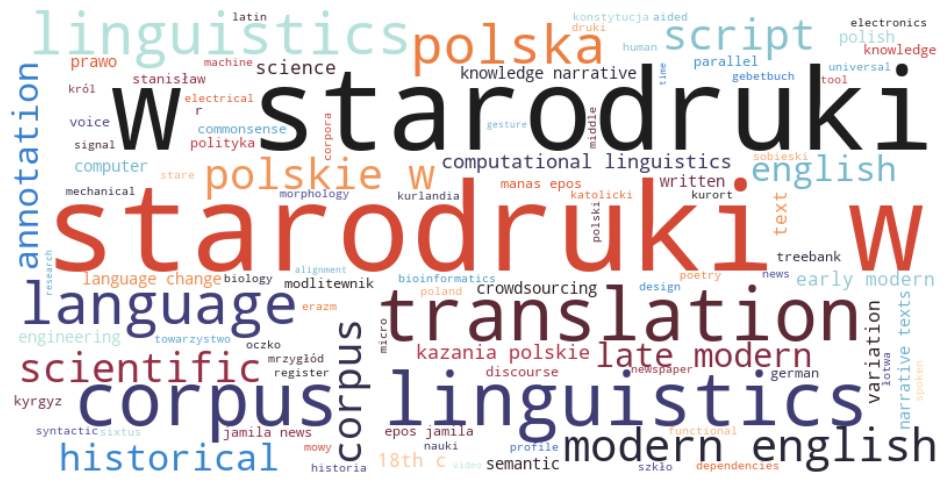

In [109]:
text_data = data_uds["subject"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Beschreibung der Ressource

[Zurück zum Anfang](#0)

{'corpus': 1.0, 'text': 0.9066666666666666, 'i': 0.84, 'with': 0.5466666666666666, 'It': 0.48, 'annotation': 0.4533333333333333, 'Adr ded': 0.4266666666666667, 'part': 0.41333333333333333, 'translation': 0.4, 'sentence': 0.37333333333333335, 'English': 0.37333333333333335, 'German': 0.36, 'language': 0.36, 'corpus is': 0.36, 'information': 0.3333333333333333, 'contain': 0.32, 'as': 0.30666666666666664, 'were': 0.29333333333333333, 'na': 0.29333333333333333, 'token': 0.29333333333333333, 'ilość skanów': 0.29333333333333333, 'skanów sygn': 0.29333333333333333, 'word': 0.28, 'different': 0.26666666666666666, 'E': 0.26666666666666666, 'version': 0.25333333333333335, 'each': 0.22666666666666666, 'Korpus': 0.22666666666666666, 'w': 0.22666666666666666, 'are': 0.21333333333333335, 'lemma': 0.2, 'register': 0.2, 'sygn St': 0.2, 'speech': 0.18666666666666668, 'GO': 0.18666666666666668, 'ist': 0.17333333333333334, 'written': 0.17333333333333334, 'ca': 0.17333333333333334, 'into': 0.1733333333333

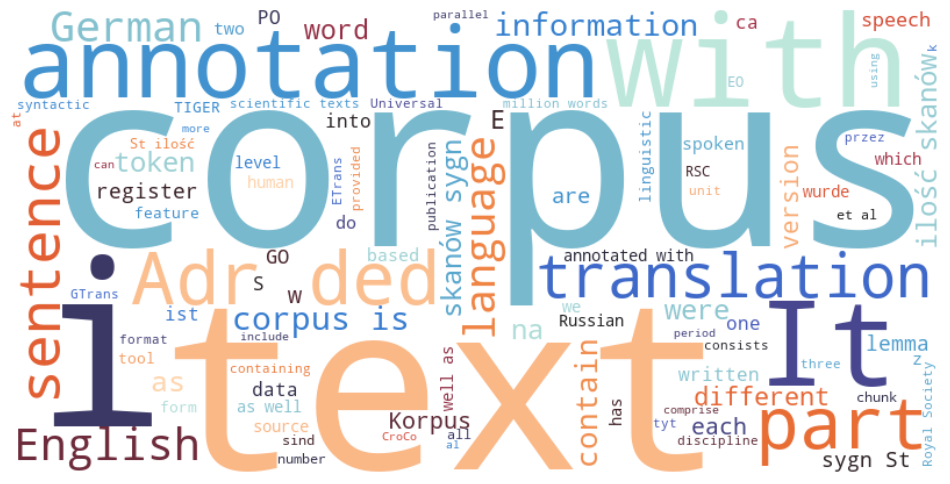

In [110]:
text_data = data_uds["description"].str.cat(sep=' ') # Werte werden als string zusammengefügt
# stopwords = set([
#     'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
#     'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
#     'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from', ]) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Mitwirkende

[Zurück zum Anfang](#0)

{'Elke': 1.0, 'Teich': 1.0, 'Stefan': 1.0, 'Manfred': 0.7, 'ca': 0.7, 'Fischer': 0.7, 'Jörg': 0.7, 'Knappen': 0.7, 'Martinez': 0.6, 'Tł': 0.6, 'Prof': 0.5, 'Pinkal': 0.5, 'Simon': 0.5, 'Ekaterina': 0.4, 'Lapshinova': 0.4, 'Koltunski': 0.4, 'Katrin': 0.4, 'Magnus': 0.4, 'Stefania': 0.4, 'Degaetano': 0.4, 'Ortlieb': 0.4, 'Hannah': 0.4, 'Kermes': 0.4, 'Michael': 0.3, 'Jose': 0.3, 'Manuel': 0.3, 'Kerstin': 0.3, 'Mihaela': 0.3, 'Vela': 0.3, 'Thater': 0.3, 'Menzel': 0.3, 'Roland': 0.3, 'Ashutosh': 0.3, 'Modi': 0.3, 'Ostermann': 0.3, 'English': 0.3, 'Aida': 0.3, 'Kasieva': 0.3, 'Teresa': 0.2, 'Hendrik': 0.2, 'Hans': 0.2, 'Oliver': 0.2, 'Kunz': 0.2, 'Erich': 0.2, 'Steiner': 0.2, 'Jan': 0.2, 'Holger': 0.2, 'Pallmann': 0.2, 'Olga': 0.2, 'Trifsik': 0.2, 'William': 0.2, 'Barry': 0.2, 'Roth': 0.2, 'Brants': 0.2, 'Christine': 0.2, 'Paul': 0.2, 'Huber': 0.2, 'Nissel': 0.2, 'Maiwald': 0.2, 'Patrick': 0.2, 'Puga': 0.2, 'Karin': 0.2, 'Werner': 0.2, 'Janina': 0.2, 'Widlitzki': 0.2, 'Bianca': 0.2, 'Andrze

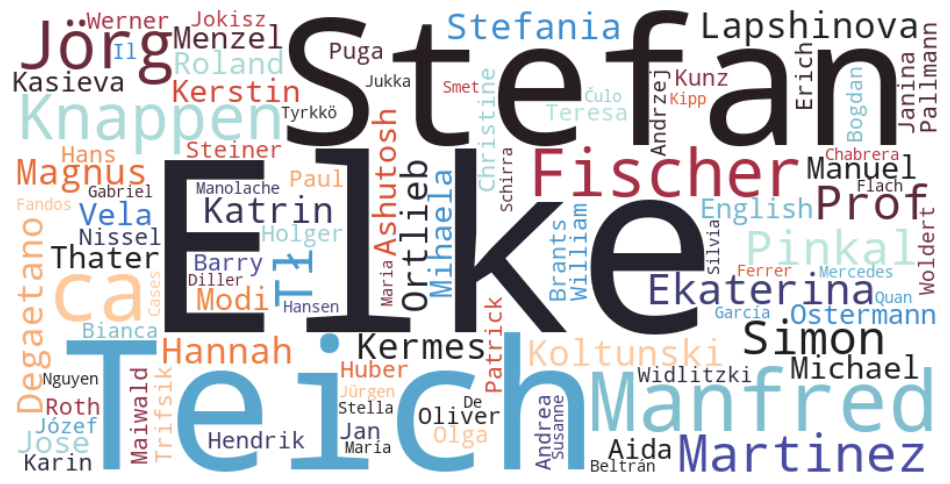

In [111]:
'Anpassung des text encodings für die Wordcloud nicht möglich'

text_data = data_uds["contributor"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set([
    'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
    'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
    'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from'])
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("UDS_Wordcloud_contributor.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud


### Publisher

[Zurück zum Anfang](#0)

{'Drukarnia': 1.0, 'Universität': 0.32142857142857145, 'Saarlandes': 0.30357142857142855, 's': 0.2857142857142857, 'n': 0.2857142857142857, 'J': 0.25, 'K': 0.25, 'XX': 0.16071428571428573, 'Lehrstuhl': 0.14285714285714285, 'Scholarum': 0.14285714285714285, 'Piarum': 0.14285714285714285, 'Rzeczypospolitey': 0.125, 'M': 0.125, 'Mci': 0.125, 'Englische': 0.10714285714285714, 'Sprach': 0.10714285714285714, 'Übersetzungswissenschaft': 0.10714285714285714, 'Fachrichtung': 0.10714285714285714, 'Sprachwissenschaft': 0.10714285714285714, 'Sprachtechnologie': 0.10714285714285714, 'Akademicka': 0.10714285714285714, 'Jesu': 0.10714285714285714, 'Fakultät': 0.08928571428571429, 'P': 0.08928571428571429, 'Andrzeja': 0.08928571428571429, 'Piotrkowczyka': 0.08928571428571429, 'Jezuitów': 0.08928571428571429, 'i': 0.08928571428571429, 'w': 0.08928571428571429, 'uds': 0.07142857142857142, 'y': 0.07142857142857142, 'Królewskiej': 0.07142857142857142, 'Collegium': 0.07142857142857142, 'Franciszka': 0.0535

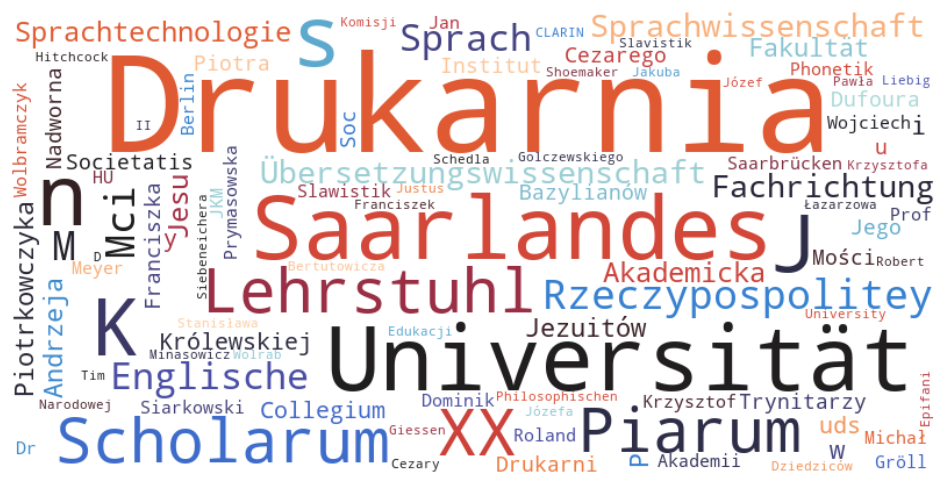

In [112]:

text_data = data_uds["publisher"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set([
    'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
    'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
    'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from'])
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("uds_publisher_wordcloud.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud